   
   ## Лабораторная работа №4. 
   Реализация приложения по распознаванию номеров домов.
   #### Данные: 
   Набор изображений из Google Street View с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9.
   #### Ход выполнения:



###### Задание 1.
Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST (http://yann.lecun.com/exdb/mnist/) или notMNIST).

Загрузим набор данных MNIST, состоящий из 60000 тренировочных и 10000 тестовых картинок размером 28х28.

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train size: ", x_train.shape)
print("Test size: ", x_test.shape)

Train size:  (60000, 28, 28)
Test size:  (10000, 28, 28)


Отобразим пример картинки.

5


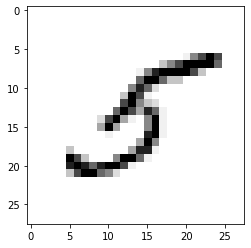

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Отобразим пример маркера картинки.

In [3]:
print("Sample labels:", y_train[image_index])

Sample labels: 5


Разделим обучающие данные на тренировочную и валидационную выборки. Нормализуем данные и подготовим под формат сети.

In [4]:
from sklearn.model_selection import train_test_split

img_rows, img_cols = 28, 28

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32') / 255.0
x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1).astype('float32') / 255.0

print("Train: ", x_train.shape)
print("Validation: ", x_valid.shape)

Train:  (48000, 28, 28, 1)
Validation:  (12000, 28, 28, 1)


Используем сверточную нейронную сеть с 2 слоями и полносвязанный слой для вывода результата.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Обучим сеть на наборе данных.

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 89s - loss: 0.2755 - accuracy: 0.9153 - val_loss: 0.0661 - val_accuracy: 0.9798
Epoch 2/10
48000/48000 - 81s - loss: 0.0915 - accuracy: 0.9732 - val_loss: 0.0453 - val_accuracy: 0.9863
Epoch 3/10
48000/48000 - 82s - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.0455 - val_accuracy: 0.9874
Epoch 4/10
48000/48000 - 75s - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 5/10
48000/48000 - 75s - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 6/10
48000/48000 - 75s - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0337 - val_accuracy: 0.9906
Epoch 7/10
48000/48000 - 77s - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.0365 - val_accuracy: 0.9904
Epoch 8/10
48000/48000 - 80s - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 9/10
48000/48000 - 81s - loss: 0.0322 - accuracy: 0.9892 - val_loss: 0.0375 - val_accuracy: 0.9899
Epoch

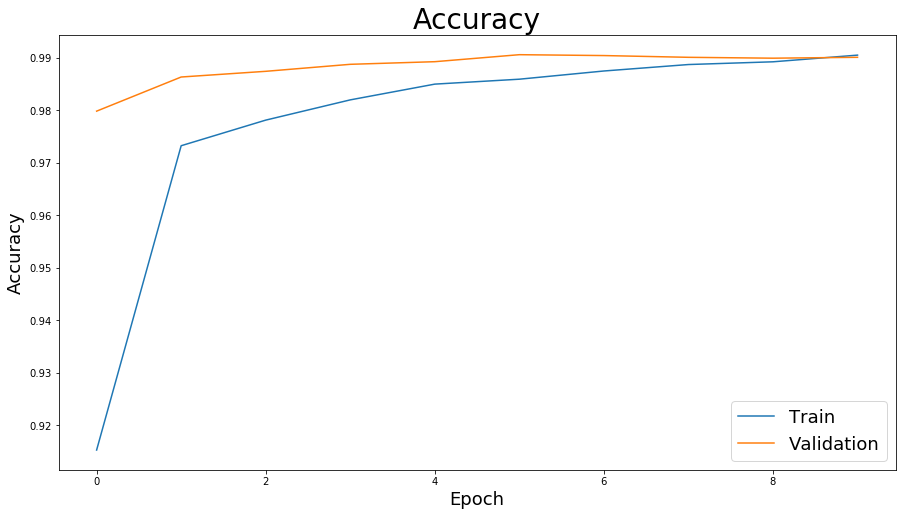

In [6]:
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_valid, y_valid))

def plot_history(history):
    plt.figure(figsize=(15, 8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy", fontsize=28)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Accuracy', fontsize=18)
    plt.legend(['Train','Validation'], fontsize=18)
    plt.show()


plot_history(history)   

Сеть показала результат точности в 99.07%.

Проверим результат сети на тестовых данных.

In [7]:
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32') / 255.0

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy = {0:.2f}%\nTest loss = {1:.2f}%'.format(test_accuracy*100.0, test_loss*100.0))

10000/1 - 4s - loss: 0.0147 - accuracy: 0.9904
Test accuracy = 99.04%
Test loss = 2.93%


Actual:  7 Prediction:  7


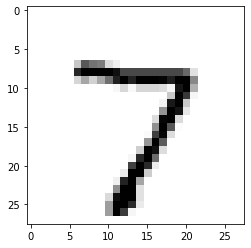

Actual:  2 Prediction:  2


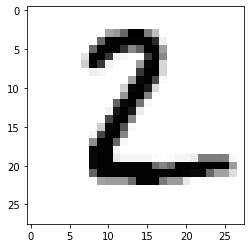

Actual:  1 Prediction:  1


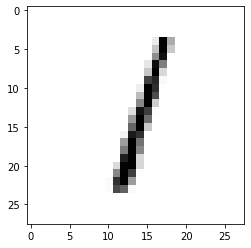

Actual:  0 Prediction:  0


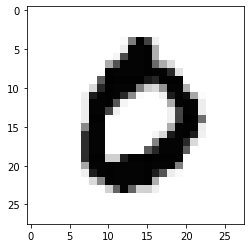

Actual:  4 Prediction:  4


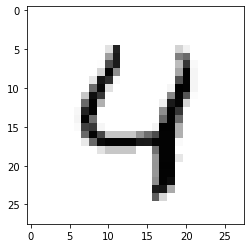

In [8]:
prediction = model.predict(x_test)

for i, test_image in enumerate(x_test[0:5]):
    print("Actual: ", y_test[i], "Prediction: ", prediction[i].argmax())
    plt.imshow(test_image.squeeze(), cmap='Greys')
    plt.show()

На тестовой выборке сеть показала результат в 99.05% и смогла предсказать все цифры.

###### Задание 2.
После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?

Загрузим данные из набора Google Street View House Numbers, содержащие изображения размером 32×32.

In [9]:
import scipy.io as sio

def load_data(path):
    data = sio.loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('./input/train_32x32.mat')
X_test, y_test = load_data('./input/test_32x32.mat')

classes = [0,1,2,3,4,5,6,7,8,9]
nb_classes = 10

print(X_train.shape, X_test.shape)

(32, 32, 3, 73257) (32, 32, 3, 26032)


Приведем данные к формату, необходимо для работы с сетью.

In [10]:
import numpy as np

X_train = X_train.transpose((3,0,1,2))
X_test = X_test.transpose((3,0,1,2))
y_train = y_train[:,0]
y_test = y_test[:,0]

print("Train Set", X_train.shape)
print("Test Set", X_test.shape)

y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
print(np.unique(y_train))

Train Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


Разделим тренировочные данные на обучающую и валидационную выборки. Нормализуем их.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=7)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print("Y Train: ", y_train.shape)
print("Y Test: ", y_test.shape)

Y Train:  (65931,)
Y Test:  (26032,)


Для проверки данных на модели переведем их из RGB в Gray scale формат.

In [12]:
import tensorflow as tf

X_test = tf.image.rgb_to_grayscale(X_test, name=None)
print("Test Set", X_test.shape)

Test Set (26032, 32, 32, 1)


Отобразим пример изображения и маркера.

Label 24411 is 5


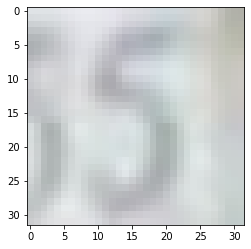

In [13]:
i = np.random.randint(1, len(X_train))
print("Label %d is" % i, y_train[i])
plt.imshow(X_train[i])
plt.show()

Приведем тестовые данные к размерности 28х28, чтобы подходили под формат модели. Проверим точность модели на тестовой выборке.

In [14]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

x_test_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((img_rows, img_cols))) for im in X_test])
score = model.evaluate(x_test_tt, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 506.9021589564046
Test accuracy: 0.18093117


Отобразим несколько примеров.

Actual:  5 Prediction:  0


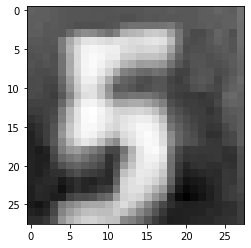

Actual:  2 Prediction:  8


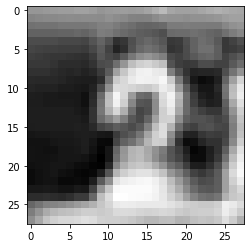

Actual:  1 Prediction:  9


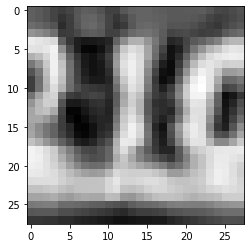

Actual:  0 Prediction:  8


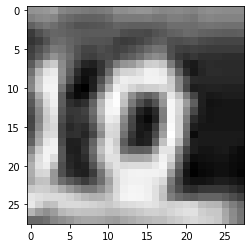

Actual:  6 Prediction:  8


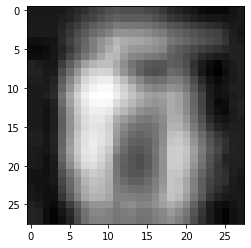

In [15]:
prediction = model.predict(x_test_tt)

for i, test_image in enumerate(x_test_tt[0:5]):
    print("Actual: ", y_test[i], "Prediction: ", prediction[i].argmax())
    plt.imshow(test_image.squeeze(), cmap='Greys')
    plt.show()

Как и ожидалось, при использовании другого набора данных модель не может точно предсказать цифры.

Подготовим новую модель, добавим больше сверточных и полносвязанных слоев.

In [16]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=3, input_shape=(32,32,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.50))

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.30))

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.30))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.10))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

Загрузим данные еще раз и подготовим под формат новой модели.

In [17]:
def load_data(path):
    data = sio.loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('./input/train_32x32.mat')
X_test, y_test = load_data('./input/test_32x32.mat')

classes = [0,1,2,3,4,5,6,7,8,9]
nb_classes = 10

print(X_train.shape, X_test.shape)

X_train = X_train.transpose((3,0,1,2))
X_test = X_test.transpose((3,0,1,2))
y_train = y_train[:,0]
y_test = y_test[:,0]

print("Train Set", X_train.shape)
print("Test Set", X_test.shape)

y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
print(np.unique(y_train))

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=7)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print("Y Train: ", y_train.shape)
print("Y Validation: ", y_val.shape)
print("Y Test: ", y_test.shape)

(32, 32, 3, 73257) (32, 32, 3, 26032)
Train Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]
Y Train:  (65931,)
Y Validation:  (7326,)
Y Test:  (26032,)


Отобразим несколько примеров данных и маркеров.

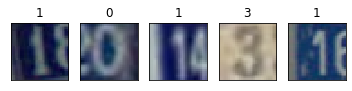

In [18]:
def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

plot_images(X_train, y_train, 1, 5)        

Обучим модель на наборе данных House Numbers.

Train on 65931 samples, validate on 7326 samples
Epoch 1/10
65931/65931 - 450s - loss: 1.2026 - accuracy: 0.6148 - val_loss: 6.8091 - val_accuracy: 0.7435
Epoch 2/10
65931/65931 - 422s - loss: 0.4315 - accuracy: 0.8657 - val_loss: 7.0129 - val_accuracy: 0.8322
Epoch 3/10
65931/65931 - 431s - loss: 0.3420 - accuracy: 0.8956 - val_loss: 5.0290 - val_accuracy: 0.8538
Epoch 4/10
65931/65931 - 429s - loss: 0.2916 - accuracy: 0.9118 - val_loss: 4.6000 - val_accuracy: 0.8503
Epoch 5/10
65931/65931 - 428s - loss: 0.2650 - accuracy: 0.9197 - val_loss: 3.8031 - val_accuracy: 0.8713
Epoch 6/10
65931/65931 - 426s - loss: 0.2382 - accuracy: 0.9289 - val_loss: 3.9861 - val_accuracy: 0.7703
Epoch 7/10
65931/65931 - 430s - loss: 0.2186 - accuracy: 0.9346 - val_loss: 3.8688 - val_accuracy: 0.8696
Epoch 8/10
65931/65931 - 412s - loss: 0.1982 - accuracy: 0.9403 - val_loss: 7.3186 - val_accuracy: 0.8212
Epoch 9/10
65931/65931 - 468s - loss: 0.1847 - accuracy: 0.9435 - val_loss: 3.9814 - val_accuracy: 0.78

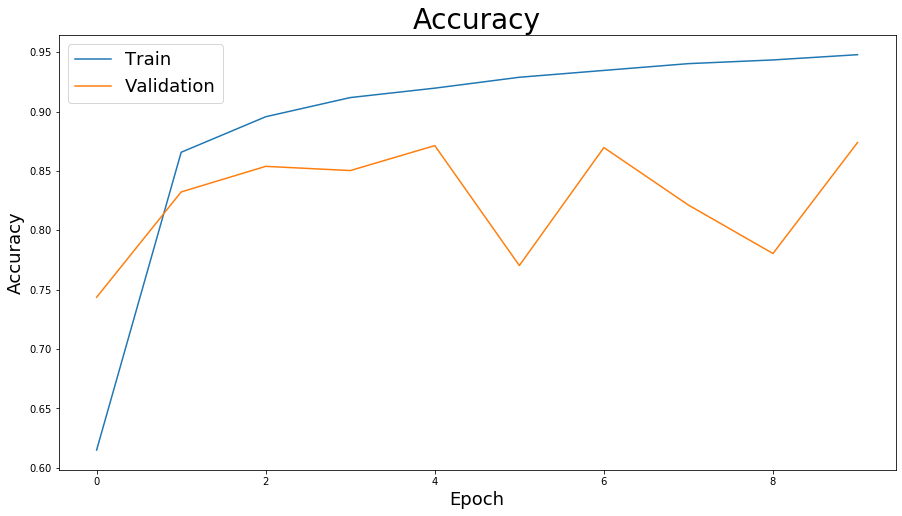

In [19]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_val, y_val))
plot_history(history)  

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])

loss: 0.2414639114740533
Test accuracy: 0.93846035


Модель показывает результат в 93.85% на тестовой выборке.

In [21]:
model.save("model.h5")

Проверем как модель распознает цифры и отобразим несколько примеров.

Actual:  5 Prediction:  5


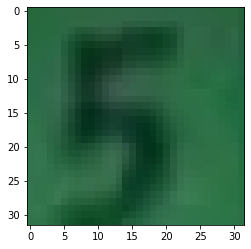

Actual:  2 Prediction:  2


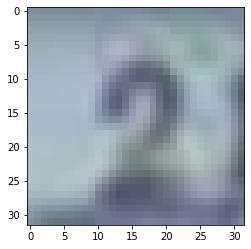

Actual:  1 Prediction:  1


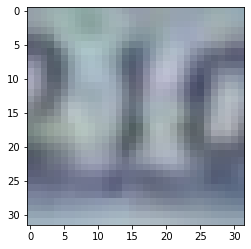

Actual:  0 Prediction:  0


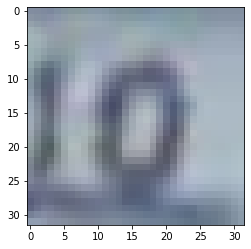

Actual:  6 Prediction:  6


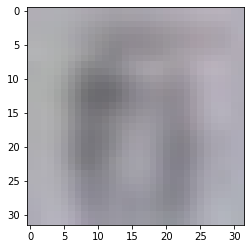

In [23]:
prediction = model.predict(X_test)

for i, test_image in enumerate(X_test[0:5]):
    print("Actual: ", y_test[i], "Prediction: ", prediction[i].argmax())
    plt.imshow(test_image)
    plt.show()

Добавим несколько примеров личных данных и отобразим их.

Original


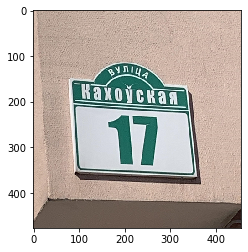

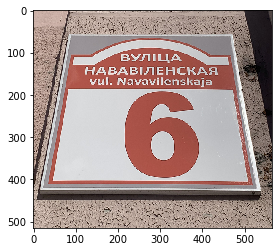

In [70]:
import matplotlib.image as mpimg
import glob
import cv2

def load_custom_imgs(path):
    image_list = []
    for filename in glob.glob(path):
        img = mpimg.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        imgplot = plt.imshow(img)
        plt.show()
        img = np.expand_dims(img, axis=0)
        image_list.append(img)
    return image_list

print("Original")
original_images = load_custom_imgs('./input/custom/custom_*.png')

Обработаем картинки и приведем к формату, чтобы можно было работать с моделью.

Cropped numbers


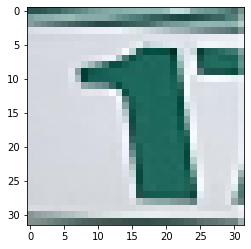

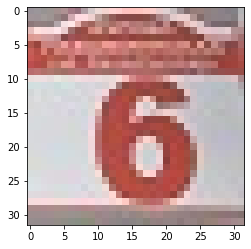

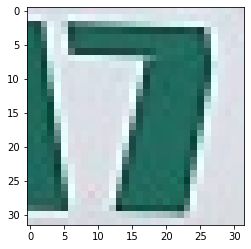

In [71]:
print("Cropped numbers")
numbers_list = load_custom_imgs('./input/custom/number_*.png')

Проверим как модель сможет распознать цифры.

Actual:  1 Prediction:  1


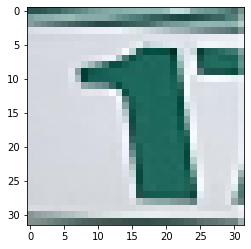

Actual:  6 Prediction:  6


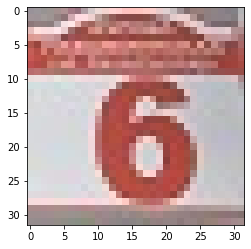

Actual:  7 Prediction:  7


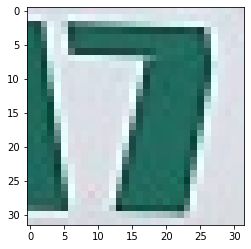

In [75]:
actual = [1, 6, 7]

for i, test_image in enumerate(numbers_list):
    print("Actual: ", actual[i], "Prediction: ", model.predict(test_image).argmax())
    plt.imshow(test_image.squeeze())
    plt.show()

Модель успешно смогла распознать данных с личных картинок.